In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


In [2]:
colors = list(mcolors.TABLEAU_COLORS.values())

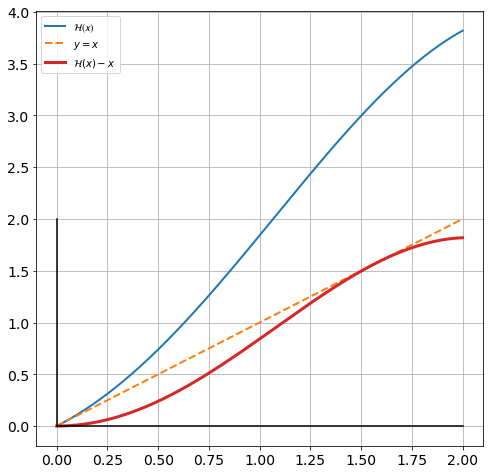

In [79]:
def hypo(x):
    return x*np.sin(x) + x

x = np.linspace(0,2,1000)
h = hypo(x)
h_res = h - x





plt.figure(figsize = (8,8))
plt.plot(x,h, label = '$\mathcal{H(x)}$', color = colors[0], linewidth = 2)
plt.plot(x,x, label = '$y=x$', linestyle = '--', color = colors[1], linewidth = 2)
plt.plot(x,h_res, label = '$\mathcal{H}(x) - x$' , linewidth = 3, color = colors[3])
plt.plot(x,x*0, '-k')
plt.plot(x*0,x , '-k')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.legend()
plt.savefig('Residual01.png')

In [75]:
x_train = np.array(random.sample(population=list(x), k = 50))
y_train = hypo(x_train)
y_res = y_train - x_train


mlp_reg = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100,100,))
mlp_reg.fit(x_train.reshape(-1,1),y_train)
y_pred = mlp_reg.predict(x.reshape(-1,1))


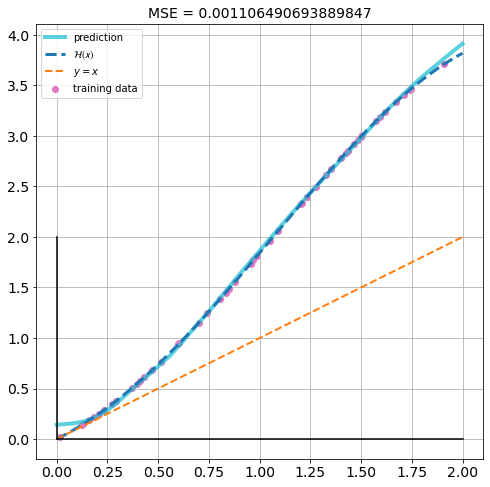

In [80]:


plt.figure(figsize = (8,8))
plt.plot(x, y_pred, label = 'prediction', linewidth = 4, color = colors[9], alpha = 0.7)
plt.plot(x,h, label = '$\mathcal{H(x)}$', color = colors[0], linewidth = 3, linestyle = '--')
plt.plot(x,x, label = '$y=x$', linestyle = '--', color = colors[1], linewidth = 2)
plt.scatter(x_train, y_train, label = 'training data', color = colors[6])
#plt.plot(x,h-x, label = '$\mathcal{H}(x) - x$' , linewidth = 3, color = colors[3])
plt.plot(x,x*0, '-k')
plt.plot(x*0,x , '-k')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.title(f'MSE = {mean_squared_error(h,y_pred)}', fontsize = 14)
plt.legend()
plt.savefig('Residual02.png')

In [77]:
res_reg = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100,100,))
res_reg.fit(x_train.reshape(-1,1), y_res)
y_res_pred = res_reg.predict(x.reshape(-1,1))

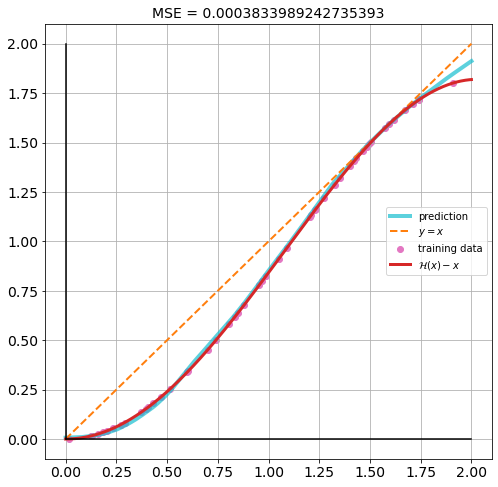

In [81]:
plt.figure(figsize = (8,8))
plt.plot(x, y_res_pred, label = 'prediction', linewidth = 4, color = colors[9], alpha = 0.7)
#plt.plot(x,h_res, label = '$\mathcal{H(x)}$', color = colors[0], linewidth = 3, linestyle = '--')
plt.plot(x,x, label = '$y=x$', linestyle = '--', color = colors[1], linewidth = 2)
plt.scatter(x_train, y_res, label = 'training data', color = colors[6])
plt.plot(x,h_res, label = '$\mathcal{H}(x) - x$' , linewidth = 3, color = colors[3])
plt.plot(x,x*0, '-k')
plt.plot(x*0,x , '-k')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.title(f'MSE = {mean_squared_error(h_res,y_res_pred)}', fontsize = 14)
plt.legend()
plt.savefig('Residual03.png')